<a href="https://colab.research.google.com/github/jorgefpont/Coursera-ML-class/blob/master/what_is_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML with Scikit Learn and Tensorflow

---



## 1. ML with Scikit

---


A simple example of solving a linear regression problem using Numpy. Enter the x, y dataset by hand. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mySeries = pd.DataFrame({'x': [1.0,2.1,3.1,3.9,5.0,6.0,6.8,7.8,8.9,9.9], 
                         'y': [6.1,10.5,11.2,12.3,16.0,19.4,21.8,20.1,23.8,21.8]})

Prepare the data so we can use it with Numpy
* Convert the data into a numpy array
* Separate it into an x and a y array (vector in this case)

In [0]:
d = np.array(mySeries)

# separate x (1st column) and y (second column)
x = np.array(d[:,0])
y = np.array(d[:,1])

# type into proper arrays (see note above)
x = x[:,np.newaxis]
y = y[:,np.newaxis]

Machine learning ... train the model (fit)
* Fit the data to a line using the linear regression model in Scikit.
* Print the slope and the intercept (m and b).
* Plot the data and the line.

slope (m) =  1.9304502897904596
y-intercept (b) =  5.779045920641998 



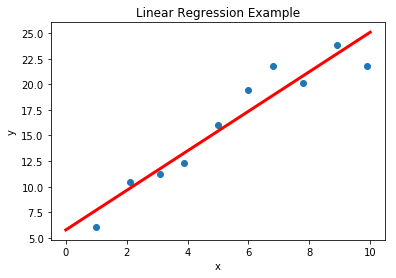

In [8]:
from sklearn import linear_model

# fit the data to a line
regression_ex = linear_model.LinearRegression()
regression_ex.fit(x,y)

# dispplay the slope and the intercept
slope = regression_ex.coef_.item()
intercept = regression_ex.intercept_.item()
print("slope (m) = ",slope)
print("y-intercept (b) = ", intercept, '\n')

# plot the data and the line
plt.title("Linear Regression Example")
plt.ylabel("y")
plt.xlabel("x")
plt.scatter(x,y)
plt.plot((0,10),(intercept,(slope*10 + intercept)), color='red', linewidth=3)

Now we can do inference. What is the x for a given y?

In [9]:
infer_value = 6
print("For x = ", infer_value,", y = ",regression_ex.predict(np.reshape([infer_value],(-1,1))))

For x =  6 , y =  [[17.36174766]]


## 2. ML with TensorFlow

---

Solving the same example using TensorFlow. No pretty plot here.

In [13]:
import tensorflow as tf
from tensorflow import keras

# to get rid of a warning message ...
import logging
logging.getLogger('tensorflow').disabled = True

# train the model
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=2500, verbose=0)

# get the slope 'm' and the y-intercept 'b'
weights = model.get_weights()
print("\nslope (m) = ",weights[0].item())
print("y-intercept (b) = ", weights[1].item())

# inference
infer_value = 10
print("For x = ", infer_value,", y = ", model.predict([10.0]).item())



slope (m) =  1.9304789304733276
y-intercept (b) =  5.778850078582764
For x =  10 , y =  25.08363914489746
